## Demo for learning field dependent aberration from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='FD',channeltype='1ch',sysfile='M4')
#L.param = io.param.load('../config/config_zernike_FD.yaml').Params

##### Edit user defined parameters

In [3]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\bead data\220524_SL_Beads_SilOilObj_M4\bead_100nm_1/'
L.param.savename = L.param.datapath + 'psfmodel1'
L.param.keyword = 'bead' # keyword for your data file
L.param.subfolder = 'bead' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.47
L.param.ccd_offset = 100
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 200 # lower this number if out of memory 

##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
psfobj,fitter = L.learn_psf(dataobj,time=0)
loc_FD = L.localize_FD(fitter) # optional step, for validating each PSF model
resfile = L.save_result(psfobj,dataobj,fitter)

E:\EMBL files\data for PSF learning\bead data\220524_SL_Beads_SilOilObj_M4\bead_100nm_1\Pos0_bead_100nm_1_Z_1\Pos0_bead_100nm_1_Z_1_MMStack_Default.ome.tif
E:\EMBL files\data for PSF learning\bead data\220524_SL_Beads_SilOilObj_M4\bead_100nm_1\Pos10_bead_100nm_1_Z_1\Pos10_bead_100nm_1_Z_1_MMStack_Default.ome.tif
E:\EMBL files\data for PSF learning\bead data\220524_SL_Beads_SilOilObj_M4\bead_100nm_1\Pos11_bead_100nm_1_Z_1\Pos11_bead_100nm_1_Z_1_MMStack_Default.ome.tif
E:\EMBL files\data for PSF learning\bead data\220524_SL_Beads_SilOilObj_M4\bead_100nm_1\Pos12_bead_100nm_1_Z_1\Pos12_bead_100nm_1_Z_1_MMStack_Default.ome.tif
E:\EMBL files\data for PSF learning\bead data\220524_SL_Beads_SilOilObj_M4\bead_100nm_1\Pos13_bead_100nm_1_Z_1\Pos13_bead_100nm_1_Z_1_MMStack_Default.ome.tif
E:\EMBL files\data for PSF learning\bead data\220524_SL_Beads_SilOilObj_M4\bead_100nm_1\Pos14_bead_100nm_1_Z_1\Pos14_bead_100nm_1_Z_1_MMStack_Default.ome.tif
E:\EMBL files\data for PSF learning\bead data\220524_S

3/6: learning: 203/250 [03:14s]  1.04it/s, current loss: 0.44890, total time: 194.94s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.49s/it total time: 198.42s
5/6: localization: 4/4 [00:00s]  5.46it/s total time: 199.15s


outlier id: [  0   1   3   8  30  31  32  59  65  66  67  70  71  80  86  91  92 103
 115 119 131 152 167 172]
rois shape channel : (165, 41, 31, 31)


3/6: learning: 207/250 [03:17s]  1.05it/s, current loss: 0.40248, total time: 397.13s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.50s/it total time: 400.62s
5/6: localization: 4/4 [00:00s]  7.48it/s total time: 401.15s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.23s/it total time: 3.23s
5/6: localization: 4/4 [00:00s] 11.71it/s total time: 3.57s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.20s/it total time: 3.19s
5/6: localization: 4/4 [00:00s] 10.95it/s total time: 3.56s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.20s/it total time: 3.19s
5/6: localization: 4/4 [00:00s]  9.34it/s total time: 3.62s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.20s/it total time: 3.20s
5/6: localization: 4/4 [00:00s] 11.16it/s total time: 3.55s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.26s/it total time: 3.25s
5/6: localization: 4/4 [00:00s] 10.12it/s total time: 3.65s
4/6: calculating spline coefficients: 1/1 [00:03s]  3.21s/it total time: 3.2

##### Show results

In [2]:
resfile = r'E:\EMBL files\data for PSF learning\bead data\220524_SL_Beads_SilOilObj_M4\bead_100nm_1\psfmodel_zernike_FD_single.h5'
f,p = io.h5.load(resfile) # load result file

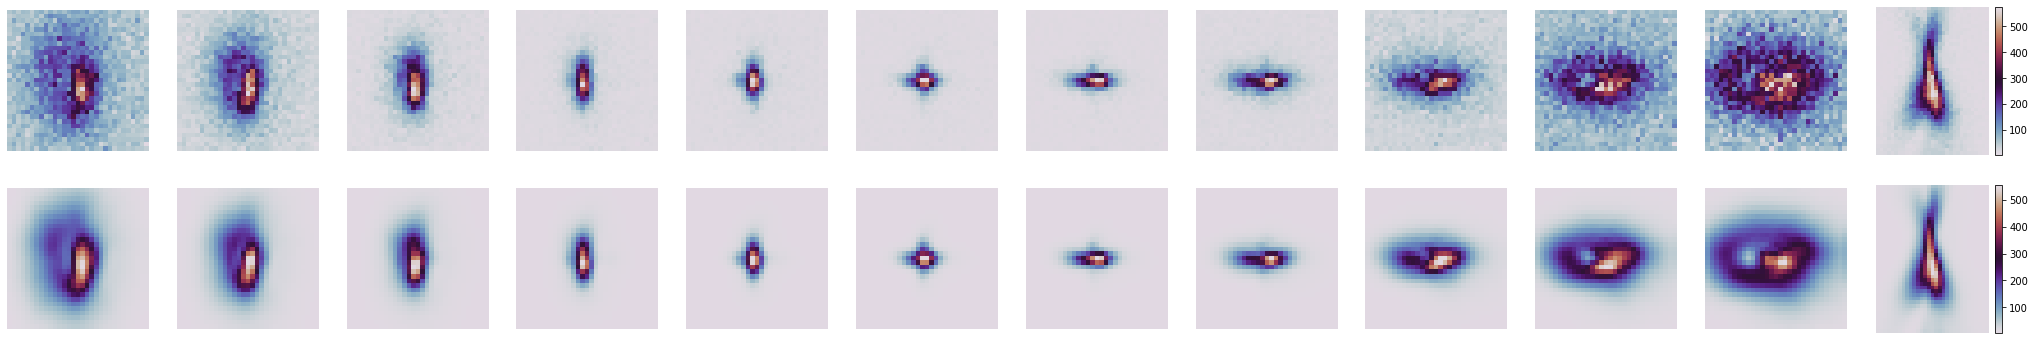

In [4]:
showpsfvsdata(f,p,index=1)

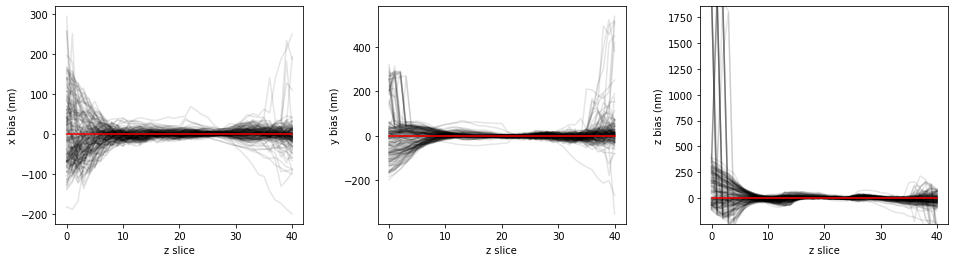

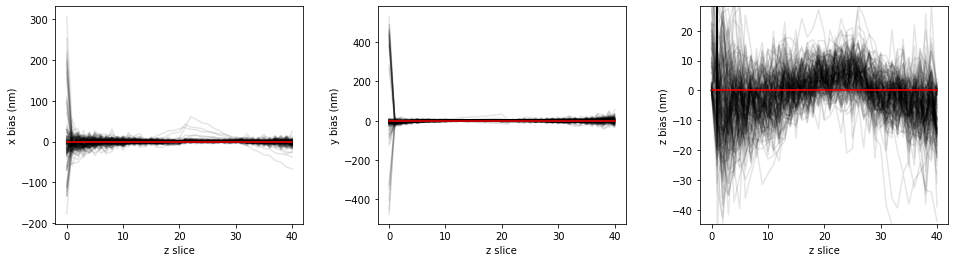

In [5]:
showlocalization(f,p)

##### Optional plots

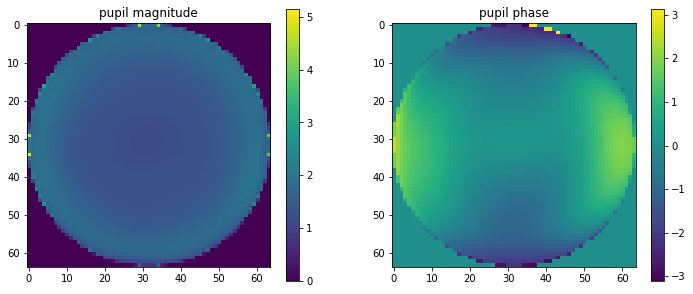

In [6]:
showpupil(f,p,index=0)

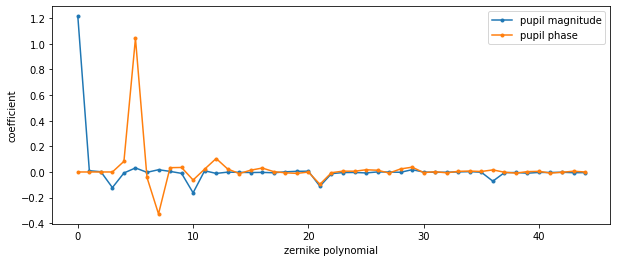

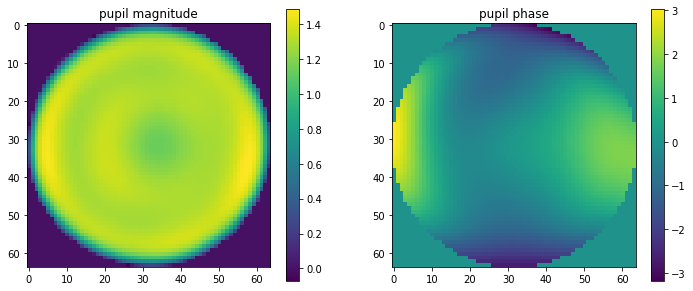

In [7]:
showzernike(f,p,index=30)

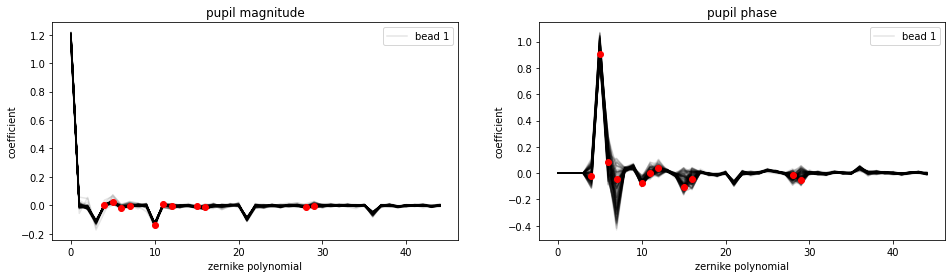

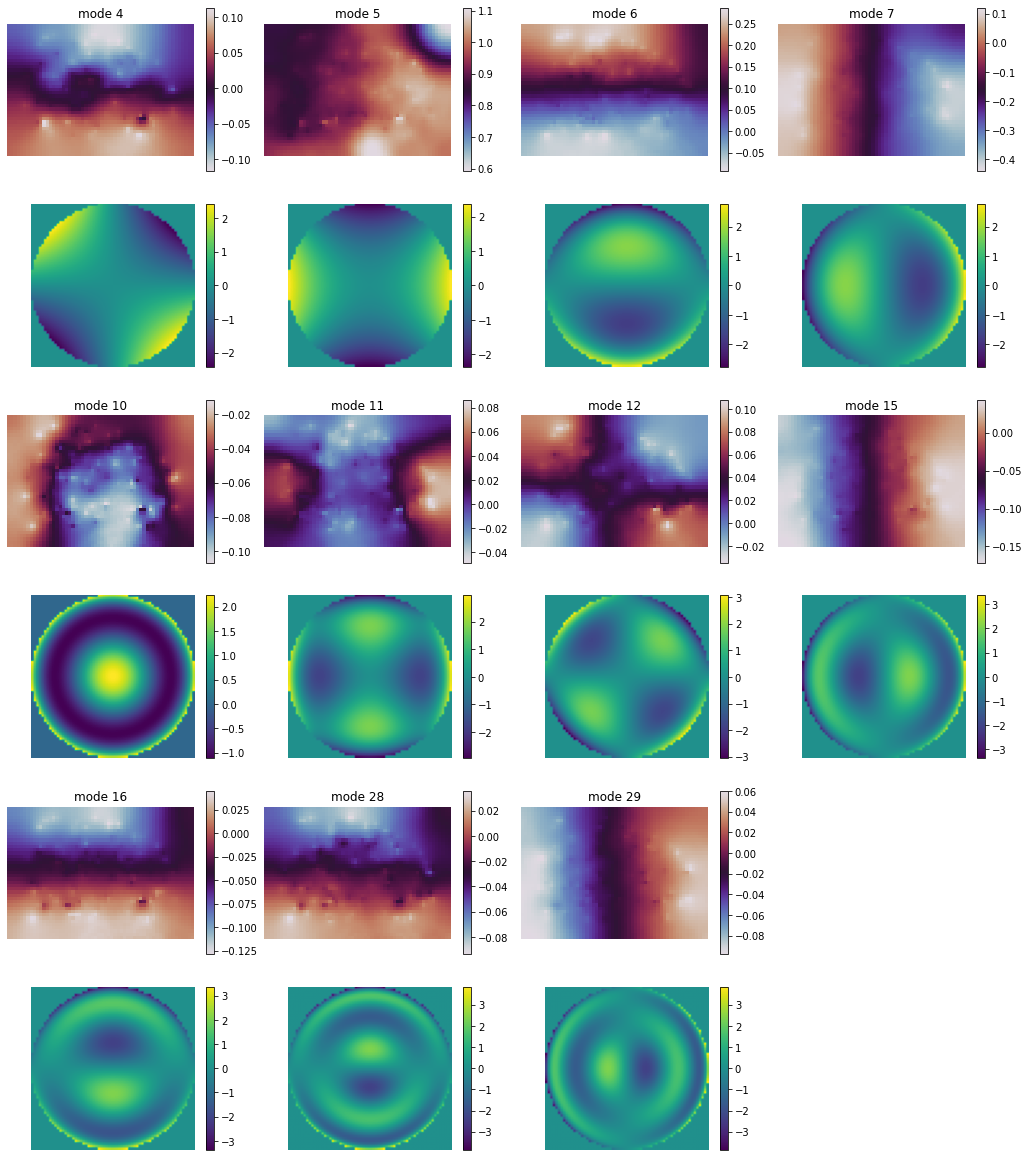

In [9]:
showzernikemap(f,p,index=[4,5,6,7,10,11,12,15,16,28,29])

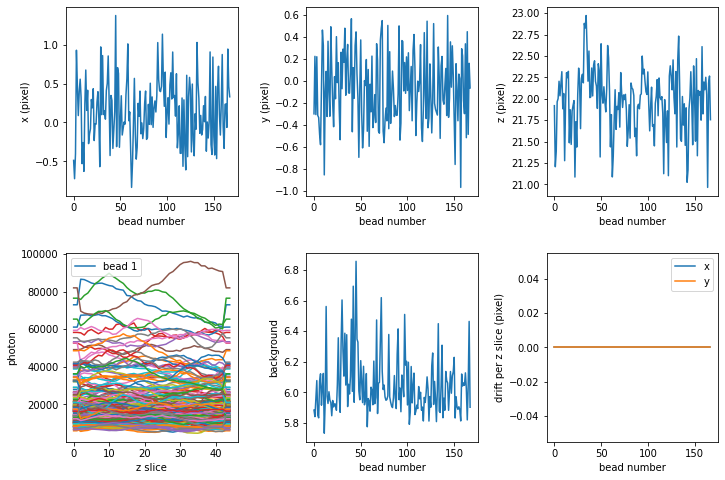

In [10]:
showlearnedparam(f,p)

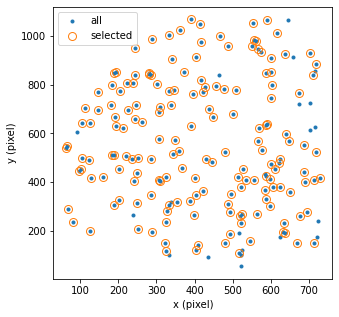

In [11]:
showcoord(f,p)